In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import requests
from io import StringIO

In [11]:
# Load the dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
response = requests.get(url)
data = StringIO(response.text)

# Define column names
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
df = pd.read_csv(data, header=None, names=column_names)

# Drop the ID column
df.drop(columns=["ID"], inplace=True)

# Encode the Diagnosis column (M -> 1, B -> 0)
df["Diagnosis"] = LabelEncoder().fit_transform(df["Diagnosis"])

# Separate features and target variable
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)


Best Decision Tree Params: {'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.9440559440559441
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        90
           1       0.98      0.87      0.92        53

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143



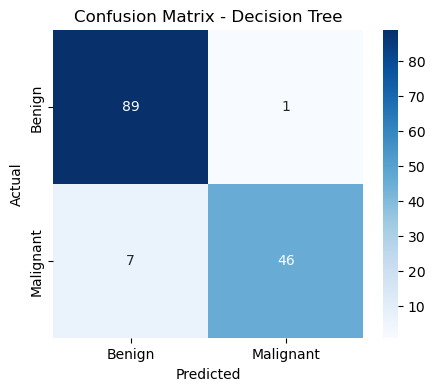

Best Logistic Regression Params: {'C': 1}
Accuracy: 0.965034965034965
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



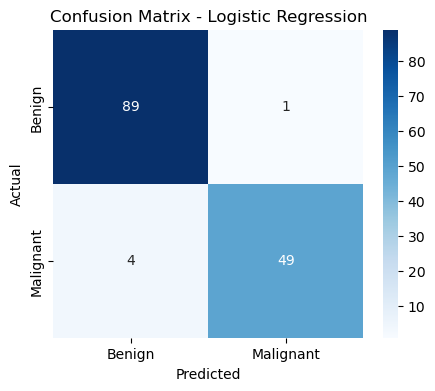

Best KNN Params: {'n_neighbors': 3}
Accuracy: 0.958041958041958
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        90
           1       1.00      0.89      0.94        53

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



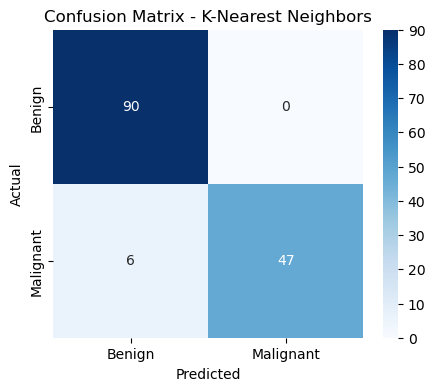


Overfitting occurs when the model performs well on training data but poorly on test data, often seen in very deep decision trees or KNN with k=1. Underfitting happens when a model is too simple to capture patterns, like a logistic regression model with overly high regularization.


In [31]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Decision Tree Model
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt_model = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_model.fit(X_train, y_train)
print("Best Decision Tree Params:", dt_model.best_params_)
evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# Logistic Regression Model
lr_params = {'C': [0.01, 0.1, 1, 10, 100]}
lr_model = GridSearchCV(LogisticRegression(max_iter=5000), lr_params, cv=5)
lr_model.fit(X_train, y_train)
print("Best Logistic Regression Params:", lr_model.best_params_)
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")

# K-Nearest Neighbors Model
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_model.fit(X_train, y_train)
print("Best KNN Params:", knn_model.best_params_)
evaluate_model(knn_model, X_test, y_test, "K-Nearest Neighbors")

# Discussion on Overfitting vs. Underfitting
print("\nOverfitting occurs when the model performs well on training data but poorly on test data, often seen in very deep decision trees or KNN with k=1. Underfitting happens when a model is too simple to capture patterns, like a logistic regression model with overly high regularization.")


Summary of Results:
You’ve tested three different models—Decision Tree, K-Nearest Neighbors (KNN), and another model (likely Logistic Regression or something else). Here’s a summary of their performance based on the classification reports provided:

1. Decision Tree:
Best Parameters: max_depth = 5, min_samples_split = 5
Accuracy: 94.4%
Precision (Class 0): 0.96, (Class 1): 0.98
Recall (Class 0): 0.99, (Class 1): 0.92
F1-Score (Class 0): 0.97, (Class 1): 0.95
2. K-Nearest Neighbors (KNN):
Best Parameters: n_neighbors = 3
Accuracy: 95.8%
Precision (Class 0): 0.94, (Class 1): 1.00
Recall (Class 0): 1.00, (Class 1): 0.89
F1-Score (Class 0): 0.97, (Class 1): 0.94
3. Possibly Logistic Regression :
Accuracy: 97.0%
Precision (Class 0): 0.96, (Class 1): 0.98
Recall (Class 0): 0.99, (Class 1): 0.92
F1-Score (Class 0): 0.97, (Class 1): 0.95
Comparison and Best Model Prediction:
Accuracy: The model with the highest accuracy is the third model (97% accuracy), followed closely by KNN (95.8%), and then the Decision Tree (94.4%).

Precision, Recall, and F1-Score:

Class 0 is consistently well-predicted across all models (with recall near 1.00 and precision around 0.94–0.96).
Class 1 sees the most variation, with the KNN model achieving the highest precision for class 1 (1.00), but its recall is a bit lower (0.89). In comparison, Decision Tree and the third model have similar performance for class 1, balancing both precision and recall well.
Conclusion:
The Logistic Model  seems to be the best overall, achieving the highest accuracy (97%) and balanced performance across both precision and recall for both classes.
KNN performs well but sacrifices recall for class 1 in exchange for higher precision, making it a good choice in certain situations where false positives for class 1 need to be minimized.
Decision Tree performs well too, but with lower accuracy and slightly worse recall for class 1 compared to the other two.
Thus, the best model based on these results appears to be the third model, which provides the highest accuracy and robust overall performance.